<a href="https://colab.research.google.com/github/Hk564/Datascience/blob/main/GaanaApp_Ratings_and_review_scraper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install app_store_scraper
!pip install matplotlib

!pip install wordcloud

In [35]:
import pandas as pd
import numpy as np
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
from app_store_scraper import AppStore
gaana = AppStore(country='in', app_name='Gaana Music', app_id ='585270521')

gaana.review(how_many=2000)

In [20]:
gaana.reviews


[{'date': datetime.datetime(2023, 3, 13, 5, 58, 25),
  'review': 'I have been using CARVAAN for few years now. Off late I have started using Alexa. I personally think that CARVAAN has to update itself to remain relevant in current times 😊\nSome of the suggestions are;\n1. It gets repetitive. So, it should be possible to update it at least once a year though internet.\n2. To use it remotely through mobile, you have to keep it ON and playing songs. To my mind, it should be easy to control it through blue tooth, if kept powered ON.\n3. If online periodical updation is not possible, please start an exchange offer so that people can have updated collections.',
  'rating': 4,
  'isEdited': False,
  'title': 'CARVAAN UPDATION',
  'userName': 'yogesh k Srivastava'},
 {'date': datetime.datetime(2021, 8, 1, 19, 7, 1),
  'review': 'I love this app because its user friendly. The collection of songs and instrumental is fairly good. What is not appreciated is that the lyrics in some cases do not mat

In [25]:
 gaana_df = pd.DataFrame(np.array(gaana.reviews),columns=['review'])

In [27]:
gaanadf2 = gaana_df.join(pd.DataFrame(gaana_df.pop('review').tolist()))
gaanadf2.head()


,date,review,rating,isEdited,title,userName,developerResponse
0,2023-03-13 05:58:25,I have been using CARVAAN for few years now. O...,4,False,CARVAAN UPDATION,yogesh k Srivastava,NaN
1,2021-08-01 19:07:01,I love this app because its user friendly. The...,5,False,Enhancing the quality of support,MohanJN,NaN
2,2020-12-15 13:11:26,Im a Gaana plus member since 2 years now. But ...,1,False,FRAOUDS & WORST CUSTOMER SUPPORT!,Aish T,NaN
3,2021-09-19 12:53:03,Writing my review as paid member and using thi...,2,False,This app needs some fixes and Customer support...,thakur.rajnish,NaN
4,2021-10-08 04:49:39,If you create a playlist and add a lot of song...,1,False,Horrible,Jatin Eligar,NaN


In [28]:
gaanadf2.to_csv('Gaana-app-reviews.csv')

In [50]:
Gaanadf2['date'] = pd.to_datetime(Gaanadf2['date'], errors='coerce')

In [53]:
Gaanadf2_2024 = Gaanadf2[Gaanadf2['date'].dt.year == 2024]

In [70]:
Gaanadf2_2024 = Gaanadf2_2024.rename(columns={'0': 'reviews'})

In [71]:
 print(Gaanadf2_2024.head())

                   date  rating  isEdited  \
159 2024-03-02 06:27:12       3     False   
212 2024-01-10 13:17:08       4     False   
213 2024-07-17 05:13:59       2     False   
255 2024-05-24 12:13:54       5     False   
387 2024-04-14 12:59:01       5     False   

                                                 title         userName  \
159                       Bug in profile edit feature.      Romil Tomar   
212                        No T-Series songs to stream     AnwayPatil21   
213                                     Playlist Error  SubhadeepMandal   
255  I recharged my account recently for one year b...        Siri_Sree   
387                                 Problem not solved           Aki me   

                                     developerResponse  \
159  {'id': 42355079, 'body': 'Hi, We appreciate yo...   
212  {'id': 41784898, 'body': 'Hi, We apologize for...   
213                                                NaN   
255  {'id': 44173914, 'body': 'Dear User, We a

In [73]:
Gaanadf2_2024.to_csv('gaana_reviews_20242.csv', index=False)

In [74]:
print(Gaanadf2_2024.columns.tolist())

['date', 'rating', 'isEdited', 'title', 'userName', 'developerResponse', 0]


In [75]:
Gaanadf2_2024 = Gaanadf2_2024.rename(columns={'0': 'reviews'})

In [76]:
print(Gaanadf2_2024.columns.tolist())

['date', 'rating', 'isEdited', 'title', 'userName', 'developerResponse', 0]


In [67]:
text = " ".join(review for review in gaanadf2['title'] if isinstance(review, str))

In [68]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

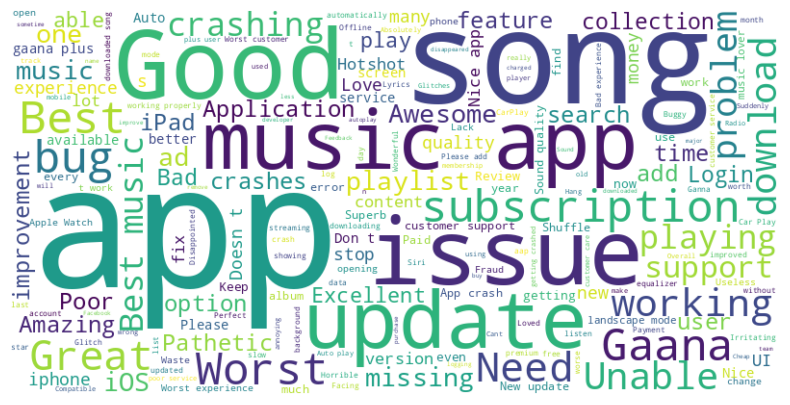

In [69]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for a cleaner look
plt.show()

In [64]:
text = " ".join(review for review in gaanadf2['title'] if isinstance(review, str))

In [41]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

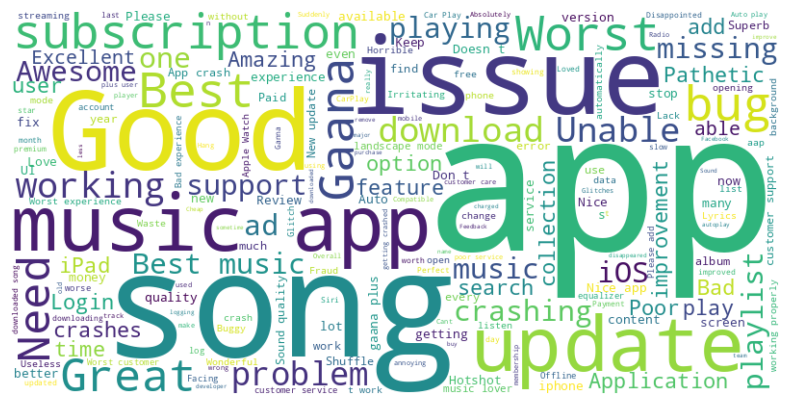

In [42]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for a cleaner look
plt.show()

In [43]:
rating_counts = Gaanadf2['rating'].value_counts()

In [44]:
labels = rating_counts.index  # Unique ratings
sizes = rating_counts.values

In [45]:
colors = plt.cm.Paired(range(len(labels)))

Text(0.5, 1.0, 'Distribution of Ratings')

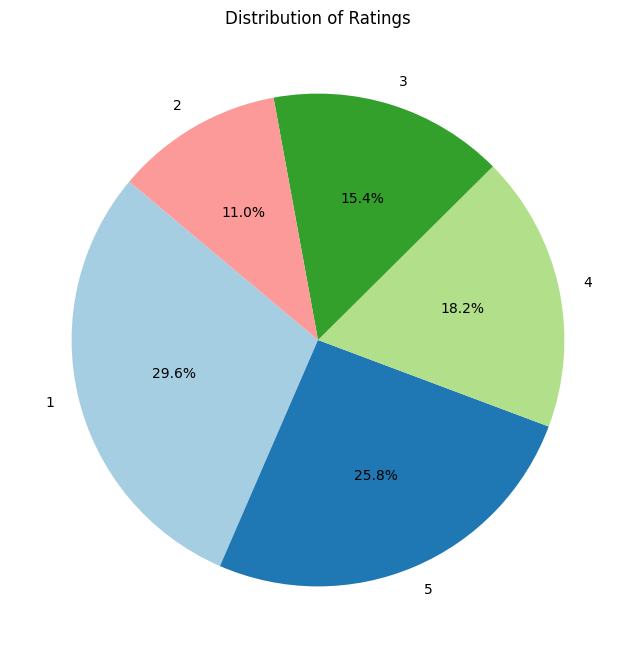

In [49]:
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')

In [48]:
plt.show()